In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prod_data = pd.read_csv('../data/Production_Crops_Livestock_E_All_Data_NOFLAG.csv', encoding = "ISO-8859-1")
prod_data.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0,19793.0,20053.0,29203.0,22134.0
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0,13083.0,17759.0
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0,38205.0,39307.0
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,NaN,NaN,...,19500.0,18500.0,18500.0,30000.0,25000.0,24500.0,26500.0,25333.0,25444.0,25759.0
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,6414.0,6757.0,6757.0,7167.0,7200.0,7075.0,7149.0,7142.0,7123.0,7138.0


In [3]:
#Removing aggregations and only keeping country-wise data
prod_data_countries = prod_data[prod_data['Area Code'] < 1000].reset_index(drop=True)

In [4]:
#Removing China as it is an aggregation of Mainland, Hong Kong, Taiwan, and Macao
prod_data_countries = prod_data_countries[prod_data_countries['Area'] != 'China'].reset_index(drop=True)
prod_data_countries.shape

(59220, 67)

In [5]:
# item code for total cereals is 1717
cereals_data = prod_data_countries[prod_data_countries['Item'] == 'Cereals, Total'].reset_index(drop=True)
cereals_data.shape

(575, 67)

In [6]:
#Top 20 cereal producing countries in 2019
cereals_data_production = cereals_data[cereals_data['Element'] == 'Production'].reset_index(drop=True)
top20_cereals_producers = cereals_data_production.nlargest(20, 'Y2019').reset_index(drop=True)
top20_cereals_producers

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,41,"China, mainland",1717,"Cereals, Total",5510,Production,tonnes,107000000.0,117640008.0,134720016.0,...,519373896.0,539346800.0,552691792.0,557417300.0,618165315.0,614697470.0,614076812.0,608917809.0,612794486.0,615518145.0
1,231,United States of America,1717,"Cereals, Total",5510,Production,tonnes,163619978.0,162455780.0,174812487.0,...,385545256.0,356210124.0,434308450.0,442849090.0,431870371.0,503466147.0,440272862.0,439711070.0,420873484.0,434875197.0
2,100,India,1717,"Cereals, Total",5510,Production,tonnes,87376496.0,87257552.0,90373008.0,...,287860000.0,293290000.0,294909510.0,296010000.0,284333000.0,297850000.0,310782330.0,321556400.0,324300640.0,335035000.0
3,21,Brazil,1717,"Cereals, Total",5510,Production,tonnes,15036353.0,15918336.0,16616892.0,...,77586276.0,89908244.0,100901726.0,101402184.0,106026685.0,84166682.0,117977014.0,103260129.0,121202845.0,125568280.0
4,185,Russian Federation,1717,"Cereals, Total",5510,Production,tonnes,NaN,NaN,NaN,...,91780914.0,68753479.0,90364971.0,103135895.0,102444492.0,117753222.0,131294322.0,109838123.0,117876704.0,130037708.0
5,9,Argentina,1717,"Cereals, Total",5510,Production,tonnes,14512100.0,13961600.0,17331100.0,...,50916576.0,47372117.0,50742603.0,50794076.0,55980088.0,61148033.0,76397805.0,70592400.0,84534610.0,86573396.0
6,101,Indonesia,1717,"Cereals, Total",5510,Production,tonnes,14367100.0,16246900.0,13952800.0,...,75902250.0,79092022.0,78606853.0,78067426.0,80643435.0,77609413.0,84176015.0,89454472.0,77190033.0,77149202.0
7,230,Ukraine,1717,"Cereals, Total",5510,Production,tonnes,NaN,NaN,NaN,...,56263263.0,45750171.0,62687582.0,63388560.0,59627180.0,65217850.0,60686540.0,69110544.0,74442198.0,64342357.0
8,68,France,1717,"Cereals, Total",5510,Production,tonnes,20802475.0,25305105.0,25367307.0,...,63954885.0,68341732.0,67537681.0,72579315.0,72875853.0,54398704.0,68730245.0,61839480.0,70378890.0,56849840.0
9,33,Canada,1717,"Cereals, Total",5510,Production,tonnes,16730306.0,29261250.0,34122307.0,...,48337200.0,51846500.0,66535401.0,51683501.0,53563000.0,58905768.0,56770935.0,58726900.0,61473900.0,65013700.0


In [7]:
years = top20_cereals_producers.columns[-28:].tolist() # X axis


In [8]:
prod_trends = top20_cereals_producers[['Area'] + years]
prod_trends

,Area,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,"China, mainland",405173951.0,393891055.0,416113700.0,451045054.0,443493425.0,456246878.0,453040320.0,405224140.0,396483872.0,...,519373896.0,539346800.0,552691792.0,557417300.0,618165315.0,614697470.0,614076812.0,608917809.0,612794486.0,615518145.0
1,United States of America,259105342.0,355934924.0,277601210.0,335780123.0,336582161.0,349425744.0,335364364.0,342631506.0,324994634.0,...,385545256.0,356210124.0,434308450.0,442849090.0,431870371.0,503466147.0,440272862.0,439711070.0,420873484.0,434875197.0
2,India,208626900.0,211941400.0,210012500.0,218750900.0,223232400.0,226877000.0,236205608.0,234931192.0,242963796.0,...,287860000.0,293290000.0,294909510.0,296010000.0,284333000.0,297850000.0,310782330.0,321556400.0,324300640.0,335035000.0
3,Brazil,43073467.0,45845332.0,49641823.0,42436960.0,44874820.0,40742023.0,47631962.0,46527202.0,57125393.0,...,77586276.0,89908244.0,100901726.0,101402184.0,106026685.0,84166682.0,117977014.0,103260129.0,121202845.0,125568280.0
4,Russian Federation,96225194.0,78650928.0,61901840.0,67441814.0,86710503.0,46853327.0,53778631.0,64242691.0,83303483.0,...,91780914.0,68753479.0,90364971.0,103135895.0,102444492.0,117753222.0,131294322.0,109838123.0,117876704.0,130037708.0
5,Argentina,25568081.0,23789591.0,26281514.0,24089764.0,36698490.0,40418872.0,31936418.0,37983923.0,36655385.0,...,50916576.0,47372117.0,50742603.0,50794076.0,55980088.0,61148033.0,76397805.0,70592400.0,84534610.0,86573396.0
6,Indonesia,54640825.0,53510380.0,57990042.0,60408927.0,58147907.0,59406188.0,60070424.0,61575000.0,59808000.0,...,75902250.0,79092022.0,78606853.0,78067426.0,80643435.0,77609413.0,84176015.0,89454472.0,77190033.0,77149202.0
7,Ukraine,42732798.0,32860971.0,32360000.0,23449056.0,34394720.0,25699039.0,23960469.0,23814124.0,38886120.0,...,56263263.0,45750171.0,62687582.0,63388560.0,59627180.0,65217850.0,60686540.0,69110544.0,74442198.0,64342357.0
8,France,55422574.0,53185121.0,53284876.0,62253509.0,63031639.0,67947148.0,64264518.0,65732235.0,60300838.0,...,63954885.0,68341732.0,67537681.0,72579315.0,72875853.0,54398704.0,68730245.0,61839480.0,70378890.0,56849840.0
9,Canada,51483100.0,46618500.0,49344200.0,58494100.0,49606900.0,50984500.0,54112600.0,51090400.0,43391400.0,...,48337200.0,51846500.0,66535401.0,51683501.0,53563000.0,58905768.0,56770935.0,58726900.0,61473900.0,65013700.0


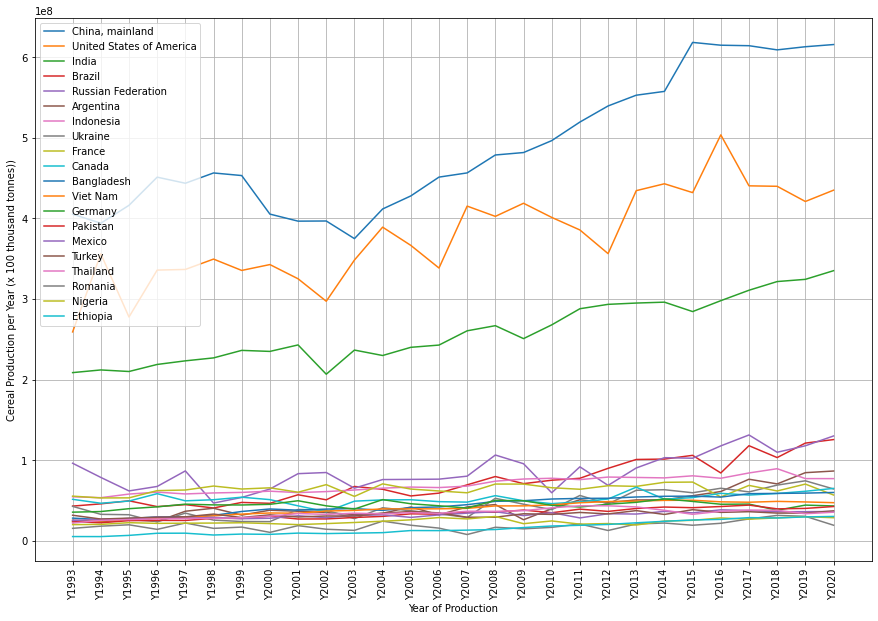

In [9]:
fig = plt.figure(figsize=(15, 10))
for index, row in prod_trends.iterrows():
    plt.plot(years, row[1:], label=row[0])

plt.legend()
plt.grid()
plt.xticks(rotation=90)
plt.xlabel("Year of Production")
plt.ylabel("Cereal Production per Year (x 100 thousand tonnes))")
plt.show()

In [10]:
# Let's see how yield has varied throughout the years now
countries = top20_cereals_producers['Area']
cereals_data_yield = cereals_data[
    (cereals_data['Area'].isin(countries))
    & (cereals_data['Element'] == 'Yield')
].reset_index(drop=True)
cereals_data_yield = cereals_data_yield[['Area'] + years]
cereals_data_yield

,Area,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,Argentina,30545.0,27598.0,29002.0,27151.0,30107.0,38120.0,33356.0,34618.0,33986.0,...,45963.0,41624.0,47956.0,48273.0,47791.0,52034.0,54045.0,46710.0,55237.0,52126.0
1,Bangladesh,26477.0,24759.0,25932.0,26942.0,26824.0,28653.0,31164.0,33844.0,33110.0,...,43528.0,43958.0,45086.0,45409.0,45604.0,46010.0,47060.0,47910.0,48108.0,49013.0
2,Brazil,23546.0,22850.0,25131.0,24222.0,25218.0,25804.0,27320.0,26433.0,31476.0,...,40375.0,45845.0,48264.0,46404.0,50006.0,41817.0,52097.0,48067.0,53216.0,52557.0
3,Canada,26470.0,25945.0,26998.0,28442.0,25846.0,27826.0,30878.0,28057.0,24468.0,...,35524.0,34563.0,41604.0,36470.0,36730.0,42391.0,41048.0,39146.0,40108.0,40794.0
4,"China, mainland",45621.0,45049.0,46593.0,48916.0,48132.0,49528.0,49449.0,47526.0,48003.0,...,57070.0,58252.0,58942.0,58919.0,59852.0,60186.0,61107.0,61266.0,62672.0,62955.0
5,Ethiopia,13130.0,9744.0,10335.0,12136.0,12639.0,11409.0,11246.0,11163.0,11980.0,...,18766.0,19633.0,21020.0,22351.0,23449.0,23522.0,25394.0,27298.0,28318.0,28613.0
6,France,65126.0,65426.0,64565.0,70824.0,68903.0,74154.0,72604.0,72315.0,67292.0,...,69193.0,72545.0,70848.0,75560.0,75700.0,56682.0,73067.0,68291.0,74919.0,63842.0
7,Germany,57117.0,58262.0,61078.0,62820.0,64849.0,63302.0,66999.0,64529.0,70552.0,...,64583.0,69649.0,73180.0,80503.0,74978.0,71821.0,72699.0,61789.0,69520.0,71333.0
8,India,20849.0,21155.0,21117.0,21810.0,22286.0,22484.0,23137.0,22942.0,24231.0,...,28607.0,29635.0,29699.0,29604.0,28567.0,30080.0,31213.0,32781.0,34049.0,32828.0
9,Indonesia,39163.0,38655.0,38428.0,39449.0,40114.0,38169.0,38957.0,40264.0,40449.0,...,48913.0,50868.0,50870.0,50991.0,53138.0,51587.0,51223.0,52440.0,52054.0,52796.0


In [11]:
cereals_data_yield["Average Increase % (Y/Y)"] = 0
cereals_data_yield["Average Increase % (Y/Y)"] = (
    cereals_data_yield["Y2020"] - cereals_data_yield["Y1993"]
)/cereals_data_yield["Y1993"]

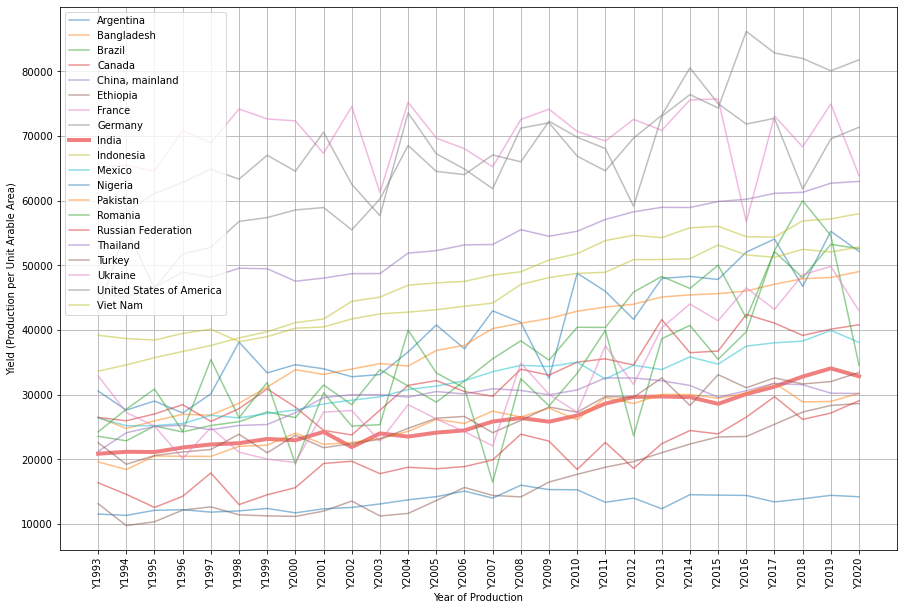

In [12]:
fig = plt.figure(figsize=(15, 10))
for index, row in cereals_data_yield.iterrows():
    if row[0] == 'India':
        plt.plot(years, row[1:-1], label=row[0], linewidth=4, color='lightcoral')
    else:
        plt.plot(years, row[1:-1], label=row[0], alpha=0.5)

plt.legend()
plt.grid()
plt.xlabel("Year of Production")
plt.ylabel("Yield (Production per Unit Arable Area)")
plt.xticks(rotation=90)
plt.show()

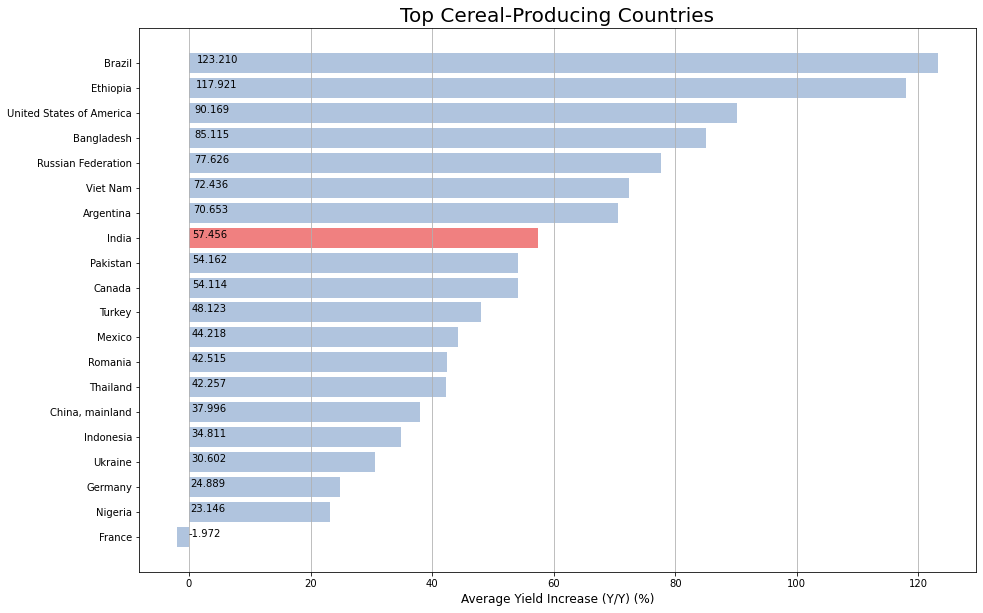

In [13]:
fig = plt.figure(figsize = (15,10))
cereals_data_yield = cereals_data_yield.sort_values("Average Increase % (Y/Y)", ascending=True)
color_list = []
for country in cereals_data_yield["Area"]:
    if country == "India":
        color_list.append("lightcoral")
    else:
        color_list.append("lightsteelblue")
plt.barh(cereals_data_yield["Area"], cereals_data_yield["Average Increase % (Y/Y)"] * 100, color = color_list)
for index, value in enumerate(cereals_data_yield["Average Increase % (Y/Y)"]):
    plt.text(value, index, "%.3f" % (value*100))

plt.grid(axis="x")
plt.xlabel("Average Yield Increase (Y/Y) (%)", fontsize=12)
plt.title("Top Cereal-Producing Countries", fontsize=20)
plt.show()
fig.savefig('../images/Exp1/yieldIncrease.jpg')

In [14]:
def get_india_rank(prod_resource):
    selected_resource_data = prod_data_countries[
        prod_data_countries['Item'] == prod_resource
    ].reset_index(drop=True)
    selected_resource_data_production = selected_resource_data[
        selected_resource_data['Element'] == 'Production'
    ].reset_index(drop=True)
    selected_resource_data_production["Ranking"] = selected_resource_data_production["Y2019"].rank(ascending=False)
    return int(
        selected_resource_data_production.loc[
            selected_resource_data_production["Area"] == "India"
        ]["Ranking"]
    )

# India's ranking in production of different UN-proposed food aggregation examples
rank_dict = {}
# cereals
rank_dict["Cereals"] = get_india_rank("Cereals, Total")

# citrus fruits
rank_dict["Citrus Fruits"] = get_india_rank("Citrus Fruit, Total")

# primary fruits
rank_dict["Primary Fruits"] = get_india_rank("Fruit Primary")

# oilcrops
rank_dict["Oilcrops"] = get_india_rank("Oilcrops, Oil Equivalent")

# pulses
rank_dict["Pulses"] = get_india_rank("Pulses, Total")

# roots and tubers
rank_dict["Roots & Tubers"] = get_india_rank("Roots and Tubers, Total")

# sugar crops
rank_dict["Sugar Crops"] = get_india_rank("Sugar Crops Primary")

#treenuts
rank_dict["Treenuts"] = get_india_rank("Treenuts, Total")

# primary vegetables
rank_dict["Vegetables"] = get_india_rank("Vegetables Primary")

# beef and buffalo meat
rank_dict["Beef"] = get_india_rank("Beef and Buffalo Meat")

# eggs
rank_dict["Eggs"] = get_india_rank("Eggs Primary")

# poultry meat
rank_dict["Poultry"] = get_india_rank("Meat, Poultry")

# milk
rank_dict["Milk"] = get_india_rank("Milk, Total")

# sheep and goat meat
rank_dict["Mutton"] = get_india_rank("Sheep and Goat Meat")

print ("{:<10} \t\t {:<10}".format('CROP/PRODUCE', 'INDIA\'s WORLD RANKING'))
for key, value in rank_dict.items():
    print ("{:<10} \t\t {:<10}".format(key, value))

CROP/PRODUCE 		 INDIA's WORLD RANKING
Cereals    		 3         
Citrus Fruits 		 3         
Primary Fruits 		 2         
Oilcrops   		 6         
Pulses     		 1         
Roots & Tubers 		 3         
Sugar Crops 		 2         
Treenuts   		 5         
Vegetables 		 2         
Beef       		 5         
Eggs       		 3         
Poultry    		 5         
Milk       		 1         
Mutton     		 2         


In [15]:
# calculating India's net food quantities (production + import - export)
food_balances_data = pd.read_csv('../data/FoodBalanceSheets_E_All_Data_NOFLAG.csv', encoding = "ISO-8859-1")
food_balances_data = food_balances_data[food_balances_data['Area Code'] < 1000].reset_index(drop=True)


In [16]:
# removing duplicate values of eggs and milk, by their item codes

food_balances_data = food_balances_data[food_balances_data["Item Code"].isin([2774, 2848]) == False]

In [17]:
# calculating import - export
food_balances_data = food_balances_data[["Area", "Item", "Element", "Y2019"]]
food_balances_data = food_balances_data.fillna(0)
population_data = food_balances_data[
    food_balances_data["Element"] == "Total Population - Both sexes"
][["Area", "Y2019"]]
population_data.rename(columns={"Y2019": "Population"}, inplace=True)
food_balances_data = food_balances_data[
    (food_balances_data["Element"] == "Import Quantity") |
    (food_balances_data["Element"] == "Export Quantity") |
    (food_balances_data["Element"] == "Production")
]
food_balances_data = food_balances_data[
    (food_balances_data["Item"] == "Cereals - Excluding Beer") |
    (food_balances_data["Item"] == "Fruits - Excluding Wine") |
    (food_balances_data["Item"] == "Vegetables") |
    (food_balances_data["Item"] == "Pulses") |
    (food_balances_data["Item"] == "Oilcrops") |
    (food_balances_data["Item"] == "Poultry Meat") |
    (food_balances_data["Item"] == "Sugar Crops") |
    (food_balances_data["Item"] == "Eggs") |
    (food_balances_data["Item"] == "Milk - Excluding Butter")
]

food_balances_data = food_balances_data.merge(population_data, on="Area")
food_balances_data.drop_duplicates(inplace=True)
food_balances_data.head()

,Area,Item,Element,Y2019,Population
0,Afghanistan,Cereals - Excluding Beer,Production,5583.0,38042.0
1,Afghanistan,Cereals - Excluding Beer,Import Quantity,2888.0,38042.0
2,Afghanistan,Cereals - Excluding Beer,Export Quantity,13.0,38042.0
3,Afghanistan,Sugar Crops,Production,46.0,38042.0
4,Afghanistan,Sugar Crops,Import Quantity,0.0,38042.0


In [18]:
# calculating net quantity per commodity
prod_subdata = food_balances_data[food_balances_data["Element"] == "Production"].drop("Element", axis=1)
prod_subdata.rename(columns={"Y2019": "Production"}, inplace=True)
imp_subdata = food_balances_data[food_balances_data["Element"] == "Import Quantity"].drop("Element", axis=1)
imp_subdata.rename(columns={"Y2019": "Import Quantity"}, inplace=True)
exp_subdata = food_balances_data[food_balances_data["Element"] == "Export Quantity"].drop("Element", axis=1)
exp_subdata.rename(columns={"Y2019": "Export Quantity"}, inplace=True)

food_balances_data = prod_subdata.merge(imp_subdata, copy=False)
food_balances_data = food_balances_data.merge(exp_subdata, copy=False)

In [19]:
food_balances_data["Net Quantity Per Capita"] = (
    food_balances_data["Production"] + food_balances_data["Import Quantity"] - food_balances_data["Export Quantity"]
)/food_balances_data["Population"]
print(food_balances_data.head())

          Area                      Item  Production  Population  \
0  Afghanistan  Cereals - Excluding Beer      5583.0     38042.0   
1  Afghanistan               Sugar Crops        46.0     38042.0   
2  Afghanistan                    Pulses        46.0     38042.0   
3  Afghanistan                  Oilcrops       145.0     38042.0   
4  Afghanistan                Vegetables      2689.0     38042.0   

   Import Quantity  Export Quantity  Net Quantity Per Capita  
0           2888.0             13.0                 0.222333  
1              0.0              0.0                 0.001209  
2            118.0             80.0                 0.002208  
3            102.0             13.0                 0.006151  
4            325.0            522.0                 0.065507  


In [20]:
# calculating India's rank wrt food available per capita, and finding countries neighbouring it
def get_india_ranking_neighbours(prod_resource):
    selected_resource_data = food_balances_data[
        food_balances_data['Item'] == prod_resource
    ].reset_index(drop=True)
    selected_resource_data["Ranking"] = selected_resource_data["Net Quantity Per Capita"].rank(ascending=False)
    india_rank = int(selected_resource_data.loc[selected_resource_data["Area"] == "India"]["Ranking"])
    range_df = selected_resource_data[
        (selected_resource_data["Ranking"] >= india_rank-3)
        & (selected_resource_data["Ranking"] <= india_rank+3)]
    return list(range_df["Area"])

# cereals
comparison_countries = set()
comparison_countries.update(get_india_ranking_neighbours("Cereals - Excluding Beer"))
comparison_countries.update(get_india_ranking_neighbours("Fruits - Excluding Wine"))
comparison_countries.update(get_india_ranking_neighbours("Vegetables"))
comparison_countries.update(get_india_ranking_neighbours("Pulses"))
comparison_countries.update(get_india_ranking_neighbours("Oilcrops"))
comparison_countries.update(get_india_ranking_neighbours("Poultry Meat"))
comparison_countries.update(get_india_ranking_neighbours("Sugar Crops"))
comparison_countries.update(get_india_ranking_neighbours("Eggs"))
comparison_countries.update(get_india_ranking_neighbours("Milk - Excluding Butter"))
comparison_countries = list(comparison_countries)
comparison_countries

['Czechia',
 'Serbia',
 'Syrian Arab Republic',
 'Fiji',
 'Madagascar',
 'Tunisia',
 'Saint Vincent and the Grenadines',
 'Switzerland',
 'Germany',
 'Guinea-Bissau',
 'South Africa',
 'Chile',
 'Malta',
 'Viet Nam',
 'Afghanistan',
 'Bangladesh',
 'Guyana',
 'India',
 'Cabo Verde',
 'Colombia',
 'Nigeria',
 'Peru',
 'Sweden',
 'Slovakia',
 'Cameroon',
 'Tajikistan',
 "Côte d'Ivoire",
 'Botswana',
 'Saudi Arabia',
 'Slovenia',
 'Turkmenistan',
 'Barbados',
 'United Kingdom of Great Britain and Northern Ireland',
 'New Caledonia',
 'Ghana',
 'Djibouti',
 'Haiti',
 'Cyprus',
 'Pakistan',
 'Ireland',
 'Russian Federation',
 'Ecuador',
 'Liberia',
 'Jamaica',
 'Egypt',
 'Vanuatu',
 'Nicaragua',
 'Latvia',
 'Mali']

In [21]:
food_insecurity_data_all = pd.read_csv("../data/Food_Security_Data_E_All_Data_NOFLAG.csv", encoding = "ISO-8859-1") 
# print(food_insecurity_data_all.head(10))
food_insecurity_data = food_insecurity_data_all[
    food_insecurity_data_all["Item"] == "Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)"
]


In [22]:
food_insecurity_data = food_insecurity_data[["Area", "Y20182020"]]
food_insecurity_data = food_insecurity_data[
    food_insecurity_data["Area"].isin(comparison_countries)
]
food_insecurity_data["Y20182020"] = pd.to_numeric(food_insecurity_data["Y20182020"], downcast = "float")

# calculating value for India
food_insecurity_data.loc[food_insecurity_data["Area"] == "India", "Y20182020"] = ((849.8 - 231.2)/1366.4)*100
food_insecurity_data.sort_values("Y20182020", ascending=False, inplace=True)

### Note:
We needed to calculate the value for India separately since the data is not available for India in the dataset on its own. However, the data for both South Asia as a whole and South Asia (excluding India) was available using which we were able to calculate the above value.

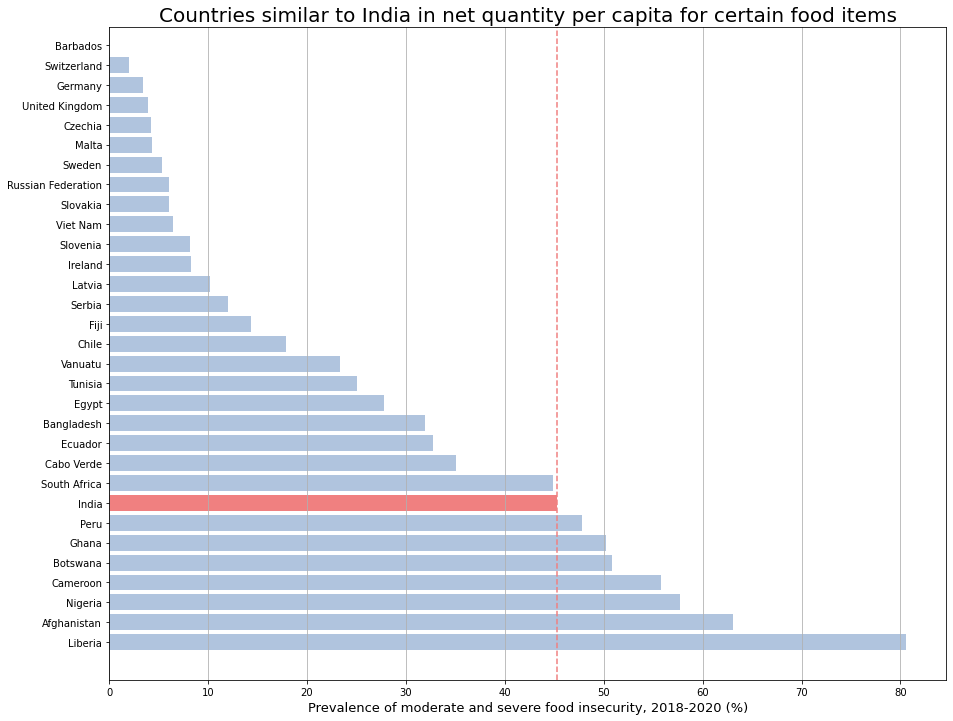

In [23]:
fig = plt.figure(figsize = (15, 12))
colors = []
food_insecurity_data.loc[
    food_insecurity_data["Area"] == "United Kingdom of Great Britain and Northern Ireland"
    , "Area"
] = "United Kingdom"
for country in food_insecurity_data["Area"]:
    if country == "India":
        colors.append("lightcoral")
    else:
        colors.append("lightsteelblue")
plt.barh(food_insecurity_data["Area"], food_insecurity_data["Y20182020"], color=colors)
plt.axvline(
    x=float(food_insecurity_data.loc[food_insecurity_data["Area"] == "India", "Y20182020"]), 
    linestyle='--', color="lightcoral"
)
plt.grid(axis="x")
plt.xlabel("Prevalence of moderate and severe food insecurity, 2018-2020 (%)", fontsize=13)
plt.title("Countries similar to India in net quantity per capita for certain food items", fontsize=20)
plt.show()
fig.savefig('../images/Exp1/comparable_quantities.jpg',  bbox_inches='tight')

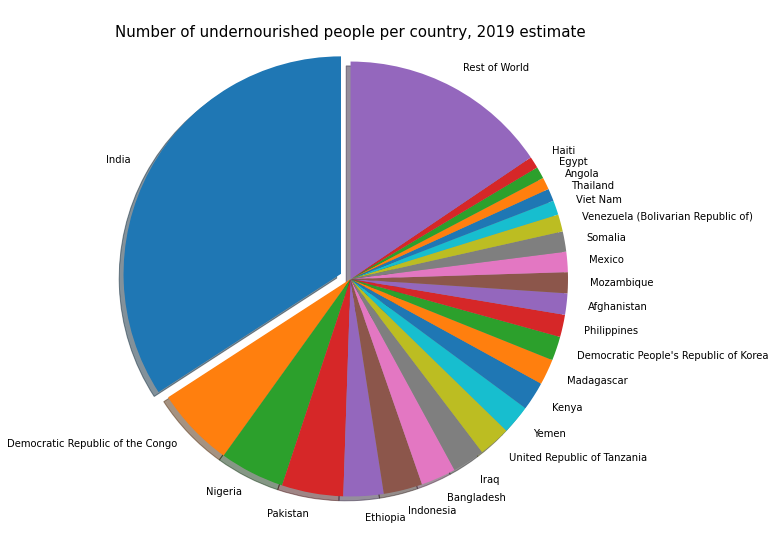

In [24]:
pd.options.mode.chained_assignment = None

undernourished_df = food_insecurity_data_all[
    food_insecurity_data_all["Item"] == "Number of people undernourished (million) (3-year average)"
]
undernourished_df.replace("<0.1", "0", inplace=True)
undernourished_df["Y20182020"] = pd.to_numeric(undernourished_df["Y20182020"])

#calculating for India
india_undernourished = 269.5 - 60.9
undernourished_df = undernourished_df[undernourished_df["Area Code"] < 400]
undernourished_df = undernourished_df[["Area", "Y20182020"]]

# concatenating other countries into a 'Rest of World' row
undernourished_df.loc[undernourished_df["Area"] == "India", "Y20182020"] = india_undernourished
undernourished_df.dropna(inplace=True)
undernourished_df_refined = undernourished_df.nlargest(24, "Y20182020")
top_undernourished = list(undernourished_df_refined["Area"])
undernourished_rest = undernourished_df[~undernourished_df["Area"].isin(top_undernourished)]["Y20182020"].sum()
undernourished_df_refined = undernourished_df_refined.append(
    {"Area": "Rest of World", "Y20182020": undernourished_rest},
    ignore_index=True
)

# plotting
fig = plt.figure(figsize = (10,10))
explode_arr = []
for country in undernourished_df_refined["Area"]:
    if country == "India":
        explode_arr.append(0.05)
    else:
        explode_arr.append(0)
plt.pie(
    undernourished_df_refined["Y20182020"],
    labels=undernourished_df_refined["Area"],
    startangle=90,
    explode=explode_arr,
    shadow=True
)
plt.title("Number of undernourished people per country, 2019 estimate", fontsize=15, y=1.0, pad=-30)
plt.show()
fig.savefig('../images/Exp1/undernourished_breakup.jpg', bbox_inches='tight')

In [25]:
# 